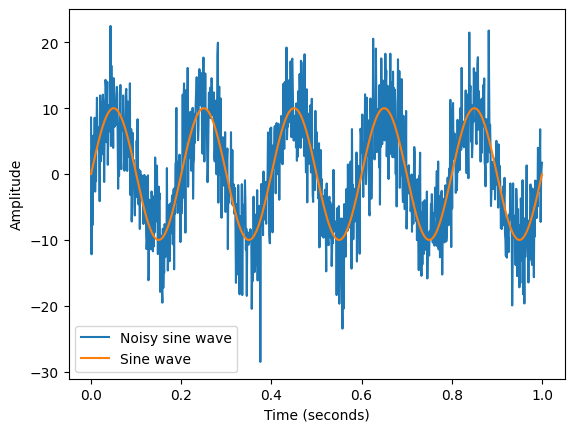

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the sine wave
amplitude = 10      # Amplitude
frequency = 5       # Frequency in Hz
time_length = 1   # Length of time in seconds
sample_rate = 1000  # Sampling rate in Hz

# Generate time points
time = np.linspace(0, time_length, sample_rate * time_length)

# Generate sine wave with noise
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)
noise = np.random.normal(scale=5, size=time.size)  # Gaussian noise with std=5

# Add noise to the sine wave
noisy_sine_wave = sine_wave + noise

# Plot the sine wave and noisy signal
plt.plot(time, noisy_sine_wave, label='Noisy sine wave')
plt.plot(time, sine_wave, label='Sine wave')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

--- 0.024857759475708008 seconds ---


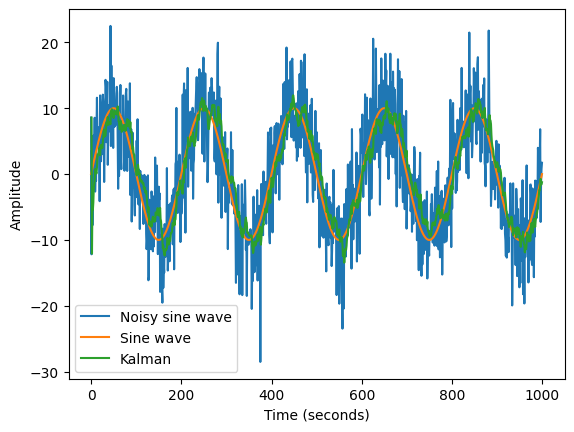

In [22]:
from filterpy.kalman import KalmanFilter
import numpy as np
import time



# Create Kalman filter for 2D position
f = KalmanFilter(dim_x=1, dim_z=1)

# Initial state (position only)
f.x = np.array([[noisy_sine_wave[0]]])  # y position

# State transition matrix (no change for constant value)
f.F = np.array([[1.]])  # Identity matrix

# Measurement matrix (measuring the 1D value directly)
f.H = np.array([[1.]])

# Process and measurement noise covariances (adjust as needed)
f.P *= 1000.  # Initial uncertainty
f.R = 5
f.Q = 0.1  # Process noise covariance for position (no velocity)

predicted = []
# Simulate and filter
start_time = time.time()
for i in range(999):
    z = np.array([[noisy_sine_wave[i + 1]]]) # Example measurements (x and y)
    f.predict()
    predicted.append(f.x[0][0])
    f.update(z)

print("--- %s seconds ---" % (time.time() - start_time))

# Plot the sine wave and noisy signal
plt.plot(np.arange(1000), noisy_sine_wave, label='Noisy sine wave')
plt.plot(np.arange(1000), sine_wave, label='Sine wave')
plt.plot(np.arange(1, 1000), predicted, label='Kalman')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()